<a href="https://colab.research.google.com/github/DIVYAAZZ/SCT_DS_3/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Confusion Matrix:
[[7759  193]
 [ 758  333]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.63      0.31      0.41      1091

    accuracy                           0.89      9043
   macro avg       0.77      0.64      0.68      9043
weighted avg       0.88      0.89      0.88      9043


Accuracy Score: 0.89


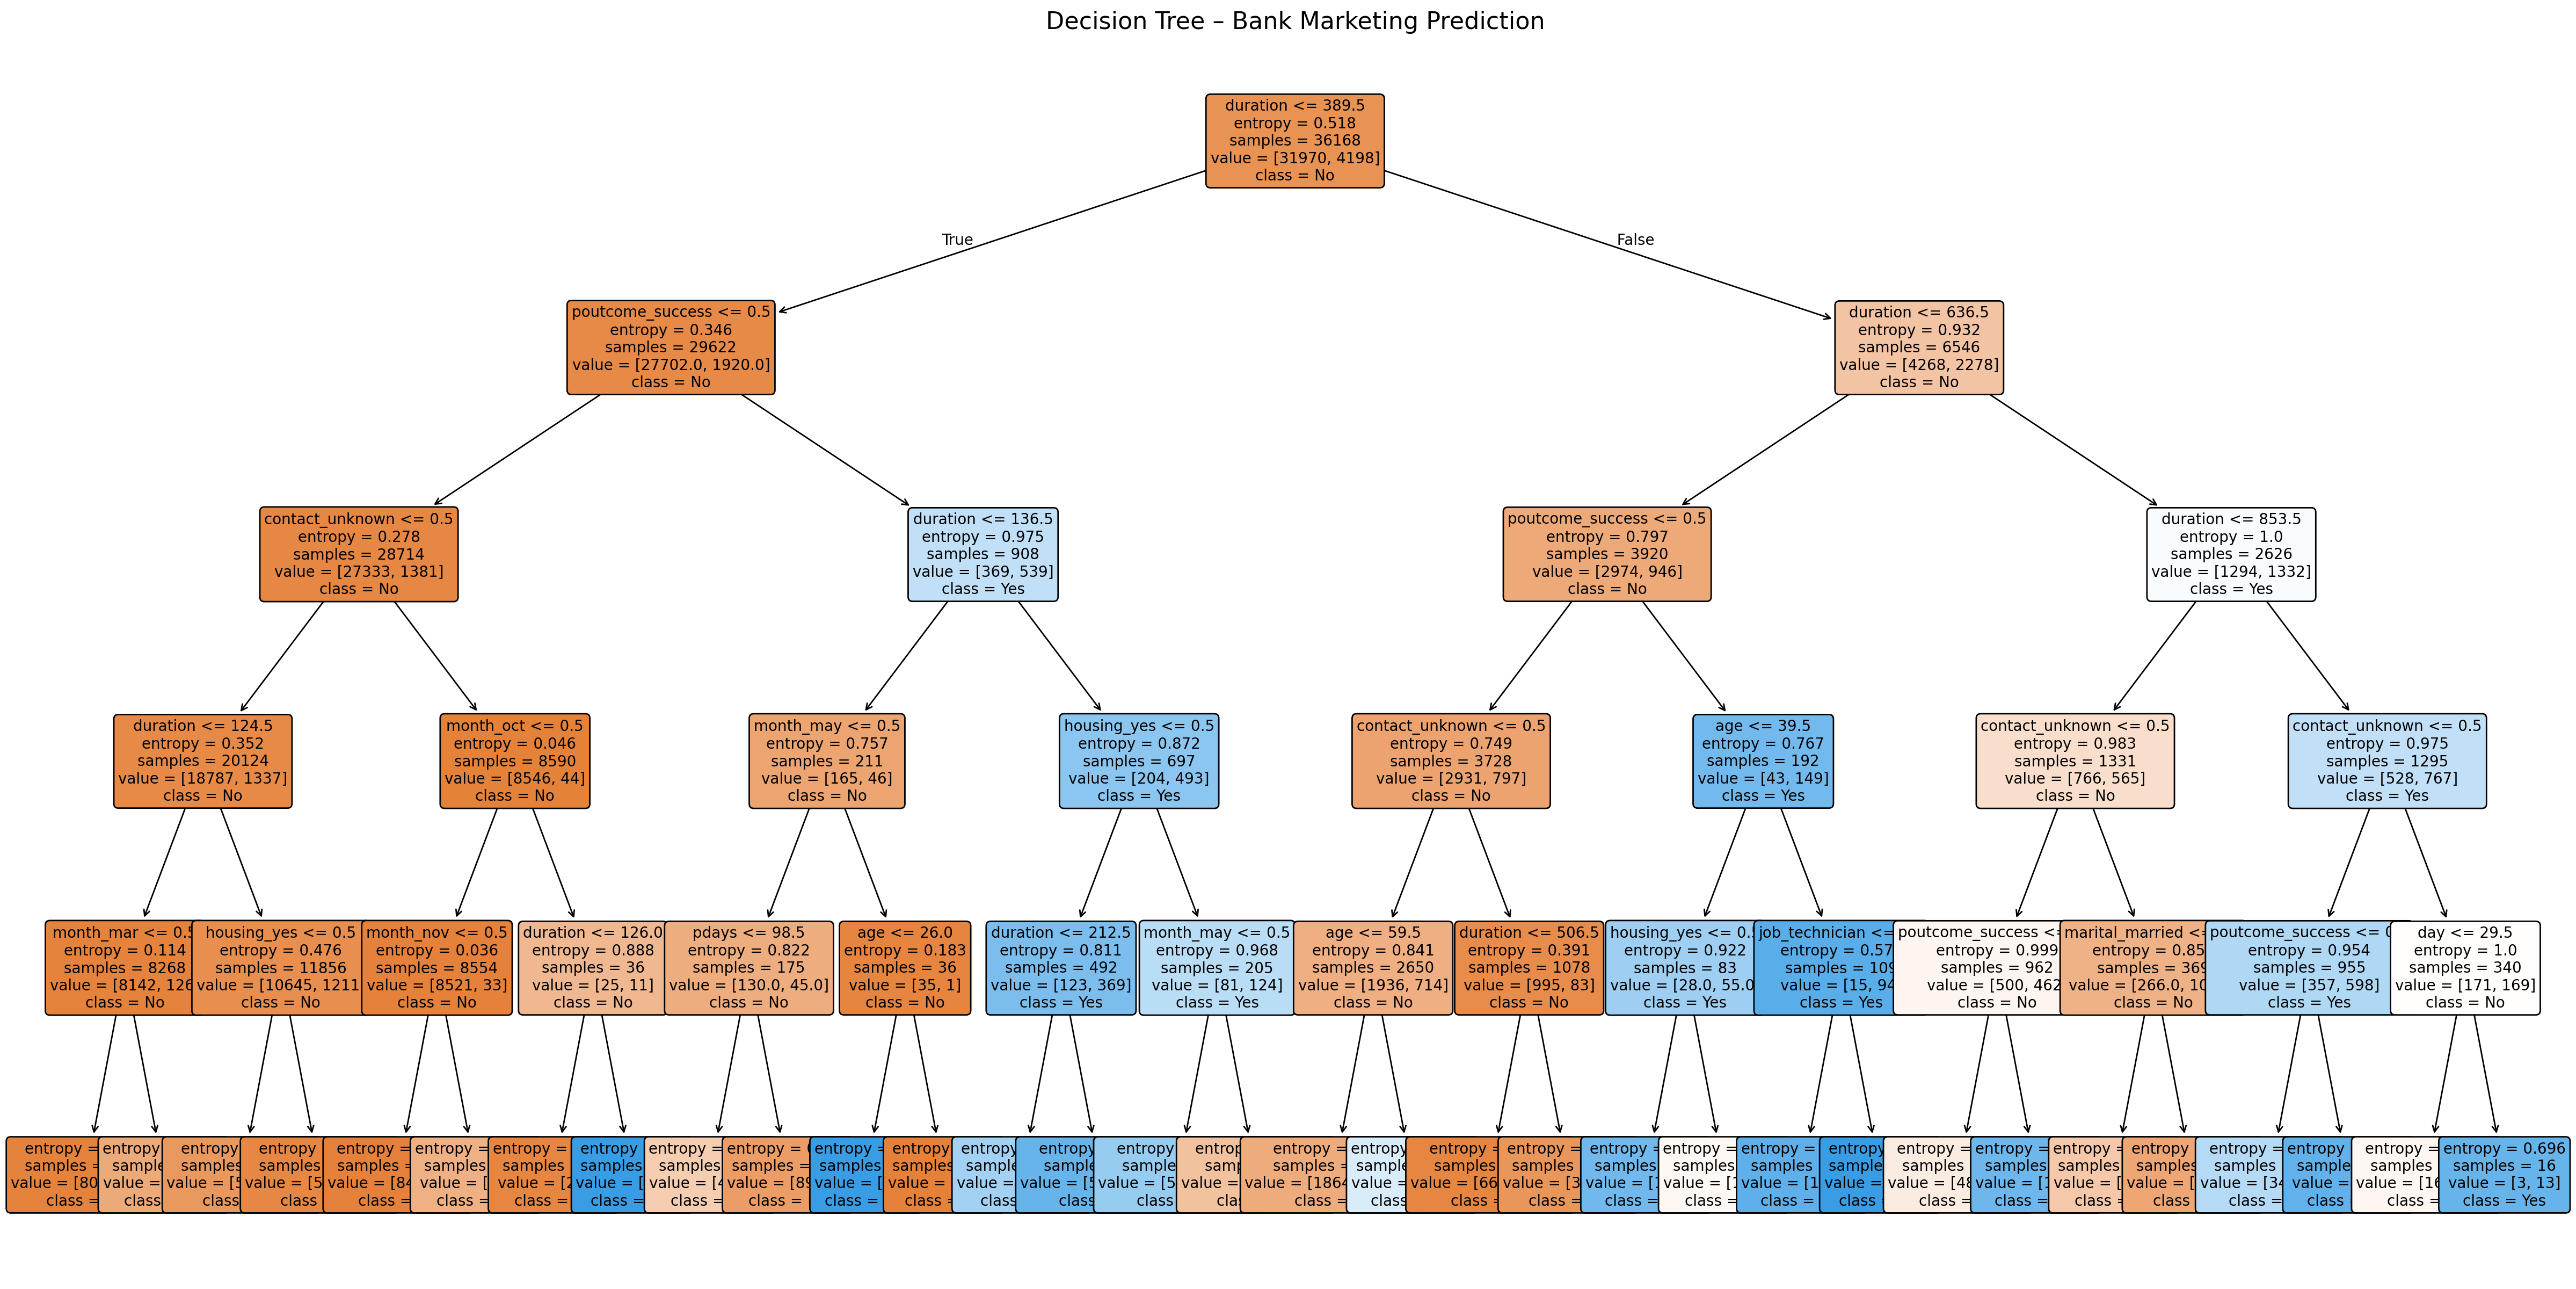

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df = pd.read_csv('bank-full.csv', sep=';')

df['y'] = df['y'].map({'yes': 1, 'no': 0})

X = pd.get_dummies(df.drop('y', axis=1), drop_first=True)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.2f}")

plt.figure(figsize=(30, 15), dpi=200)
plot_tree(
    clf,
    filled=True,
    feature_names=X.columns,
    class_names=["No", "Yes"],
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree – Bank Marketing Prediction", fontsize=16)
plt.show()

